In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = "d_reflector"
rcs_file = "../output/" + model + '_rcs.csv'
exePath = "C://development//optix//OptixRCS//build//bin//Debug//TrianglesRcs.exe"
exePath = "C://development//optix//OptixRCS//build//bin//Release//RcsSpeedBranch.exe"

In [3]:
phi = "0,90,0.025"
theta = "90,90,1"
freq = "15E9"
ray_per_lambda = 10
subprocess.run([exePath, str(freq), str(
    phi), str(theta), str(ray_per_lambda), model])

CompletedProcess(args=['C://development//optix//OptixRCS//build//bin//Release//RcsSpeedBranch.exe', '15E9', '0,90,0.025', '90,90,1', '10', 'd_reflector'], returncode=0)

In [4]:
csv = np.genfromtxt (rcs_file, delimiter=",")

csv = csv[~np.isnan(csv[:,3])]
# Extract phi and rcs columns from the DataFrame
freq_values = csv[:,0]
phi_values = csv[:,1]
theta_values = csv[:,2]
rcs_values = csv[:,3]
print(rcs_values.shape)
print("rcs max: ", max(rcs_values))
print("rcs min: ", min(rcs_values))

(3601,)
rcs max:  47.9688
rcs min:  7.50767


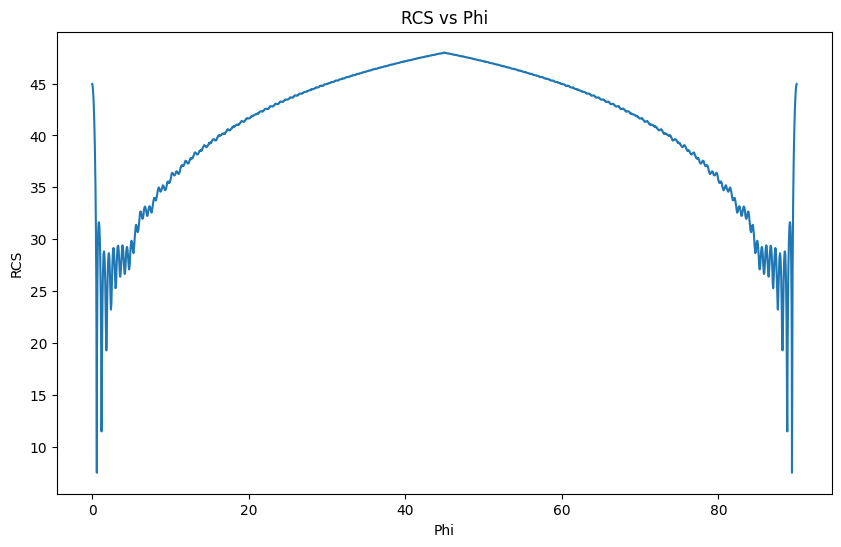

In [5]:
# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(phi_values, rcs_values)
plt.xlabel('Phi')  # X-axis label
plt.ylabel('RCS')  # Y-axis label
plt.title('RCS vs Phi')  # Plot title
plt.show()  # Display the plot